In [1]:
import os
import sys
import pickle as pk
import numpy as np

In [2]:
os.listdir()

['debug_netmums_scrape_135results.py', 'Untitled.ipynb', '.ipynb_checkpoints']

In [3]:
os.chdir('../')

In [4]:
[file for file in os.listdir('facebook/') if file.endswith('.pkl')]

['sp_search_results_temp.pkl',
 'fb_data_searchscrape_BACKUP.pkl',
 'ddg_search_results_temp.pkl',
 'manual_search_resdict.pkl',
 'fb_safety.pkl',
 'google_search_results.pkl',
 'specific_fb_groups.pkl',
 'fb_search_results.pkl',
 'fb_data_searchscrape.pkl',
 'few-google_search_results_temp.pkl',
 'google_search_results_temp.pkl',
 'specific_fb_pages.pkl']

In [5]:
[file for file in os.listdir('netmums/') if file.endswith('.pkl')]

['basicblurbs.pkl',
 'allposts_rerun.pkl',
 'allposts2.pkl',
 'allposts.pkl',
 'basicblurbs2.pkl']

In [73]:
#Load Datasets
with open('facebook/fb_data_searchscrape.pkl', 'rb') as f:
    fb_search = pk.load(f)
with open('facebook/fb_data_searchscrape.pkl', 'rb') as f:
    fb_search = pk.load(f)
with open('facebook/fb_data_searchscrape.pkl', 'rb') as f:
    fb_search = pk.load(f)


In [74]:
len(temp)

447

In [75]:
import re
import matplotlib.pyplot as plt

In [76]:
posts = [key for key in temp.keys() if re.search('posts/[^?]+',key)]
pages = [key for key in temp.keys() if not re.search('posts/[^?]+',key)]

In [77]:
len(posts)


225

total comments scraped: 4679


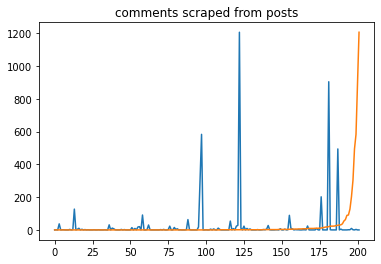

In [96]:
tt = [len(temp[post][0]['comments_full']) for post in posts if temp[post][0]['comments_full'] is not None]
plt.plot(tt)
plt.title('comments scraped from posts')
print('total comments scraped:', sum(tt))
plt.plot(np.sort(tt))

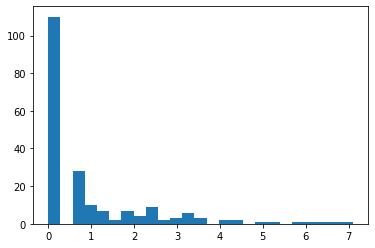

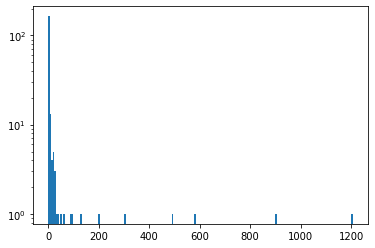

In [97]:
plt.hist(np.log([i + 1 for i in tt]), bins=25)
plt.show()
plt.hist(tt, bins=200)
plt.yscale('log')

total comments scraped: 324941


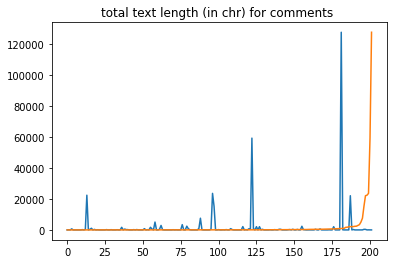

In [81]:
#sum([len(c['comment_text']) for c in temp[post][0]['comments_full']])
tt = [sum([len(c['comment_text']) for c in temp[post][0]['comments_full']]) for post in posts if temp[post][0]['comments_full'] is not None]
plt.plot(tt)
plt.title('total text length (in chr) for comments ')
print('total comments scraped:', sum(tt))
plt.plot(np.sort(tt))

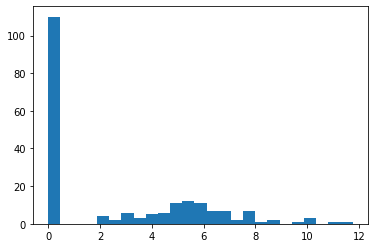

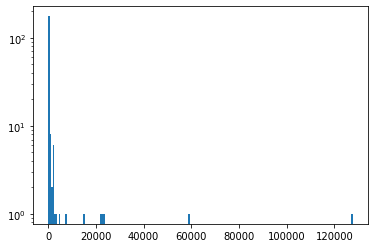

In [95]:
plt.hist(np.log([i + 1 for i in tt]), bins=25)
plt.show()
plt.hist(tt, bins=200)
plt.yscale('log')

a lot of comments couldnt be extracted and are at zero.

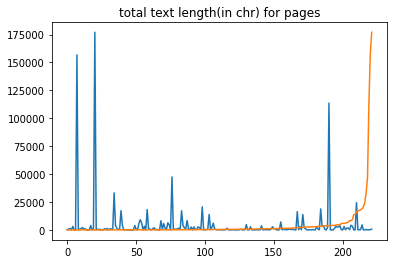

In [80]:
tt = [sum([sum( [len(c['comment_text']) for c in post['comments_full'] if c]) for post in temp[page] if post['comments_full']]) for page in pages]
plt.plot(tt)
plt.title('total text length(in chr) for pages')
plt.plot(np.sort(tt))

In [14]:
# ^^ theres some pages with a lot of text but few comments. :)

In [15]:
#TODO; convert the data to a dataframe (?? is this even useful...)

## Examine Netmums Scrape

In [16]:
with open('netmums/allposts_rerun.pkl', 'rb') as f:
    temp = pk.load(f)

In [41]:
emptykeys = []
for key in temp.keys():
    if len(temp[key]['posts']) == 0:
        emptykeys.append(key)
        
for key in emptykeys:   
    temp.pop(key, None)

In [42]:
len(temp)
#6497 threads

6497

In [43]:
nmkeys = list(temp.keys())

total comments scraped: 245750


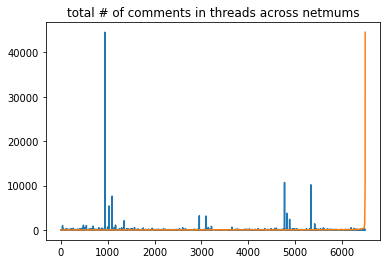

In [44]:
tt = [len(temp[key]['posts']) for key in nmkeys]
plt.plot(tt)
plt.plot(np.sort(tt))
plt.title('total # of comments in threads across netmums')
print('total comments scraped:', sum(tt))

Text(0.5, 1.0, 'histogram of log(# comments in threads)')

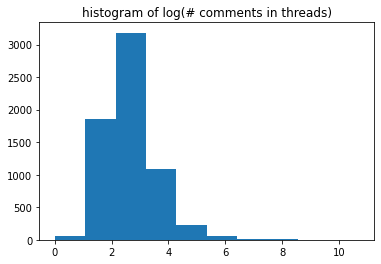

In [45]:
plt.hist(np.log(tt))
plt.title('histogram of log(# comments in threads)')

In [46]:
np.quantile(tt, q=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99, 0.999])

array([   5.  ,    7.  ,    9.  ,   10.  ,   13.  ,   15.  ,   19.  ,
         26.  ,   43.4 ,  233.04, 3160.2 ])

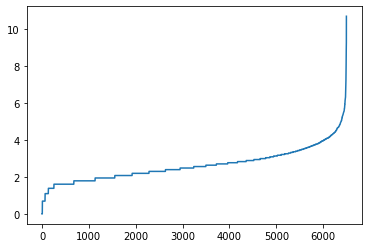

In [47]:
plt.plot(np.sort(np.log(tt)))

In [186]:
np.quantile(tt, q=[0.97,0.975,0.979,0.98,0.99, 0.999, 0.9995, 0.9999, 0.99999, 1])

array([104.34 , 112.   , 126.038, 135.   , 135.   , 135.   , 135.   ,
       337.17 , 425.217, 435.   ])

In [35]:
#there are threads with 0 posts?? what??
noposts = [key for key in nmkeys if len(temp[key]['posts']) == 0]

In [36]:
noposts
#it's posts which are 404.

['https://www.netmums.com/coffeehouse/advice-support-40/young-parents-support-500/1297671-any-brighton-mums-feeling-isolated-all.html',
 'https://www.netmums.com/coffeehouse/advice-support-40/young-parents-support-500/1676817-need-help-all.html',
 'https://www.netmums.com/coffeehouse/being-mum-794/toddlers-1-3-years-59/index691.html',
 'https://www.netmums.com/coffeehouse/being-mum-794/parenting-advice-192/1869694-getting-started-new-look-forum.html',
 'https://www.netmums.com/coffeehouse/money-advice-1127/budgeting-609/index65.html',
 'https://www.netmums.com/coffeehouse/life-504/lifestyle-17/index11.html',
 'https://www.netmums.com/coffeehouse/drop-clinic-984/maternal-mental-health-995/index51.html',
 'https://www.netmums.com/coffeehouse/tweens-teens-581/tweens-teens-61/index52.html',
 'https://www.netmums.com/coffeehouse/drop-clinic-984/baby-child-health-989/index79.html',
 'https://www.netmums.com/coffeehouse/becoming-mum-pregnancy-996/preparing-baby-870/index100.html',
 'https://w

In [190]:
weird_keys_nm = [key for key in nmkeys if len(temp[key]['posts']) == 135]
successful_keys_nm = [key for key in nmkeys if len(temp[key]['posts']) > 135]

In [189]:
weird_keys_nm

['https://www.netmums.com/coffeehouse/family-food-recipes-555/food-tips-ideas-556/840648-healthy-non-processed-cheap-foodie-thread.html',
 'https://www.netmums.com/coffeehouse/other-chat-514/news-12/743981-do-you-pay-your-prescriptions.html',
 'https://www.netmums.com/coffeehouse/product-tests-sponsored-chat-competitions-251/netmums-product-testing-181/1710804-review-thread-super-yummies-dairy-pots-product-trial.html',
 'https://www.netmums.com/coffeehouse/being-mum-794/babies-birth-12-months-58/1637916-can-i-give-my-5-month-baby-ambrosia-custard.html',
 'https://www.netmums.com/coffeehouse/family-food-recipes-555/feeding-kids-481/1405002-water-only-policy-madness.html',
 'https://www.netmums.com/coffeehouse/other-chat-514/news-12/593997-what-issue-baby-jars-ready-made-baby-food-anyway.html',
 'https://www.netmums.com/coffeehouse/baby-794/babies-birth-12-months-58/487733-anyone-refused-immunisation-vaccination.html',
 'https://www.netmums.com/coffeehouse/family-food-recipes-555/feeding

total posts scraped: 113106833


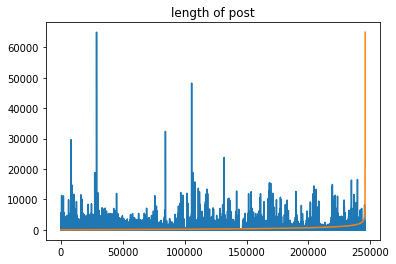

In [50]:
#length of each post
tt = [len(post['body']) for key in nmkeys for post in temp[key]['posts']]
plt.plot(tt)
plt.plot(np.sort(tt))
plt.title('length of post')
print('total posts scraped:', sum(tt))

total posts scraped: 113106833


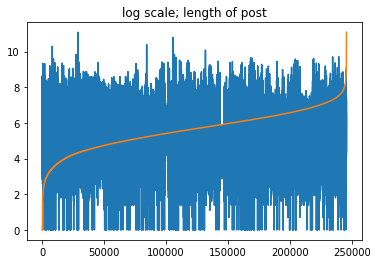

In [55]:
#length of each post
ll = np.log([i + 1 for i in tt])
plt.plot(ll)
plt.plot(np.sort(ll))
plt.title('log scale; length of post')
print('total posts scraped:', sum(tt))

Text(0.5, 1.0, 'average length of posts in a thread')

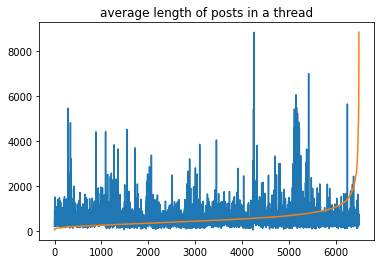

In [57]:
#average post length per thread
tt = [np.mean([len(post['body']) for post in temp[key]['posts']]) for key in nmkeys]
plt.plot(tt)
plt.plot(np.sort(tt))
plt.title('average length of posts by thread')

Text(0.5, 1.0, 'average length of posts in a thread')

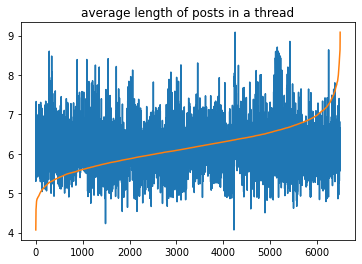

In [59]:
#average post length per thread
ll = np.log(tt)
plt.plot(ll)
plt.plot(np.sort(ll))
plt.title('log scale: average length of posts by thread')

Text(0.5, 1.0, 'nmuber of queries a thread showed up in')

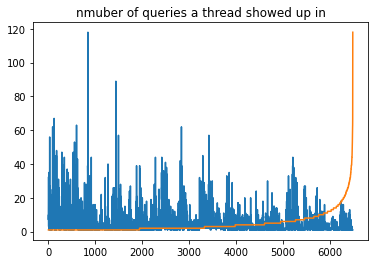

In [62]:
#number of queries a thread showed up in
tt = [len(temp[key]['query']) for key in nmkeys]
plt.plot(tt)
plt.plot(np.sort(tt))
plt.title('nmuber of queries a thread showed up in')

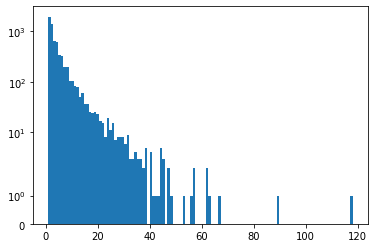

In [72]:
plt.hist(tt, bins = 120)
plt.yscale('symlog')
plt.title('Histogram of number of queries a thread came up in')